In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
dataset = dataset.drop('Date/Time', axis=1)

In [5]:
dataset

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow
8780,0.2,-2.4,83,24,9.7,100.03,Snow
8781,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,-0.2,-1.8,89,28,9.7,99.91,Snow


In [6]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [7]:
import pandas as pd

# Example: your dataframe
# df = pd.DataFrame({"Weather": [...]})

# Convert to lowercase for consistent matching
dataset["Weather"] = dataset["Weather"].str.lower()

# Use regex replacement with dictionary mapping
dataset["Weather_Simplified"] = dataset["Weather"].replace({
    r".*(clear).*": "Clear",                 # clear, mainly clear
    r".*(cloud).*": "Cloud",                 # cloudy, mostly cloudy
    r".*(rain|drizzle|shower|thunderstorm).*": "Rain",  # rain, drizzle, thunderstorm, showers
    r".*(snow|flurries|pellet).*": "Snow",   # snow, snow showers, pellets
    r".*(fog|mist|haze).*": "Fog"            # fog, mist, haze
}, regex=True)

# Check distribution
print(dataset["Weather_Simplified"].value_counts())


Weather_Simplified
Cloud    3797
Clear    3432
Rain      921
Snow      464
Fog       170
Name: count, dtype: int64


In [8]:
dataset.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Weather_Simplified'],
      dtype='object')

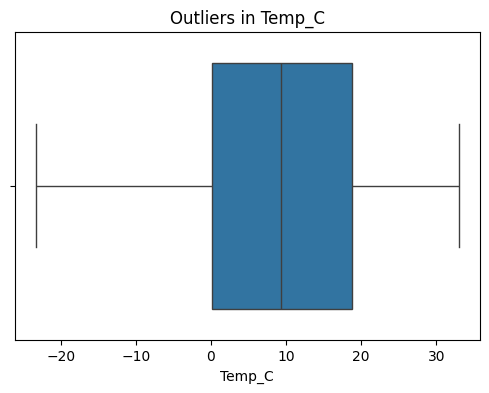

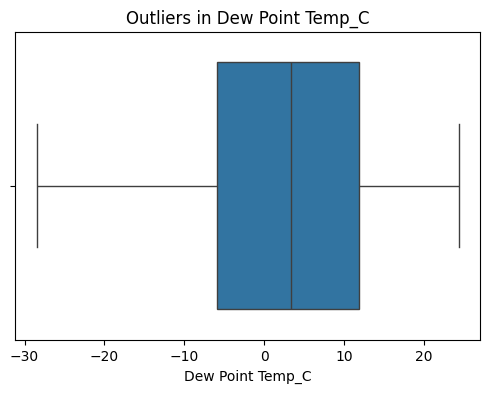

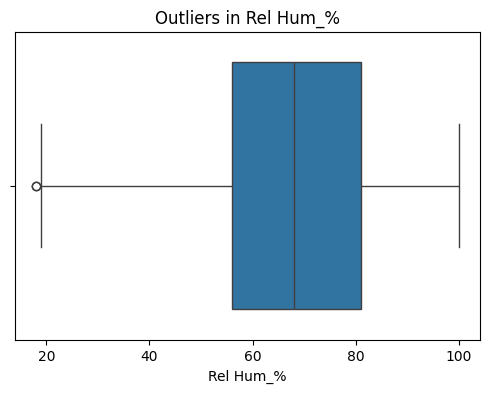

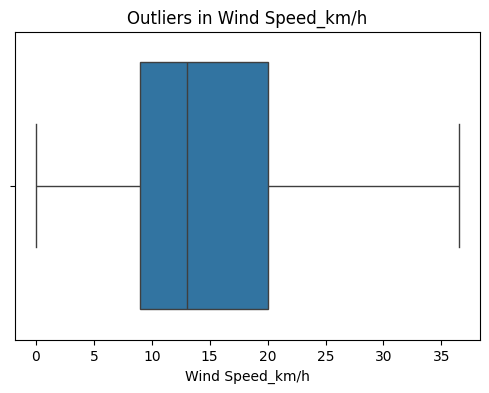

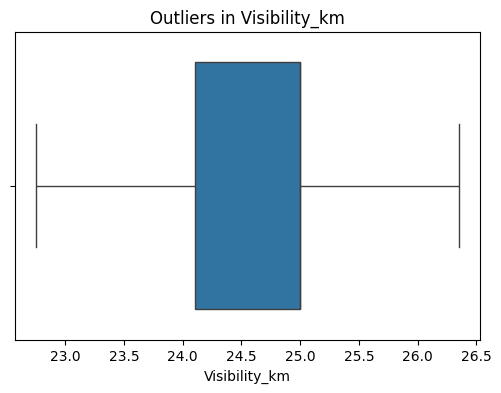

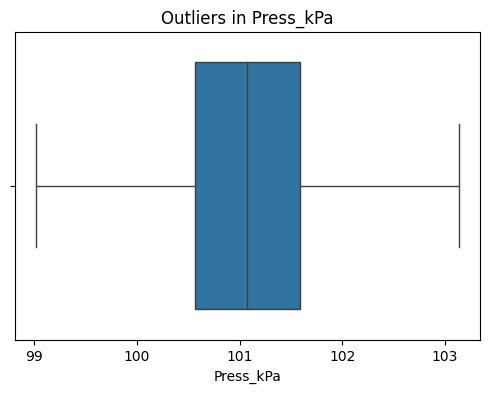

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dataset.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=dataset[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [10]:
# For Visibility_km
Q1_vis = dataset['Visibility_km'].quantile(0.25)
Q3_vis = dataset['Visibility_km'].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis
l_vis = Q1_vis - 1.5 * IQR_vis
u_vis = Q3_vis + 1.5 * IQR_vis

# For Wind Speed_km/h
Q1_ws = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_ws = dataset['Wind Speed_km/h'].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws
l_ws = Q1_ws - 1.5 * IQR_ws
u_ws = Q3_ws + 1.5 * IQR_ws

#for press_kpa
Q1 = dataset['Press_kPa'].quantile(0.25)
Q3 = dataset['Press_kPa'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [11]:
import numpy as np

# Replace (cap) values outside bounds
dataset['Visibility_km'] = np.where(dataset['Visibility_km'] < l_vis, l_vis,
                           np.where(dataset['Visibility_km'] > u_vis, u_vis, dataset['Visibility_km']))

dataset['Wind Speed_km/h'] = np.where(dataset['Wind Speed_km/h'] < l_ws, l_ws,
                             np.where(dataset['Wind Speed_km/h'] > u_ws, u_ws, dataset['Wind Speed_km/h']))

dataset['Press_kPa'] = np.where(dataset['Press_kPa'] < lower, lower,np.where(dataset['Press_kPa'] > upper, upper,
                        dataset['Press_kPa']))


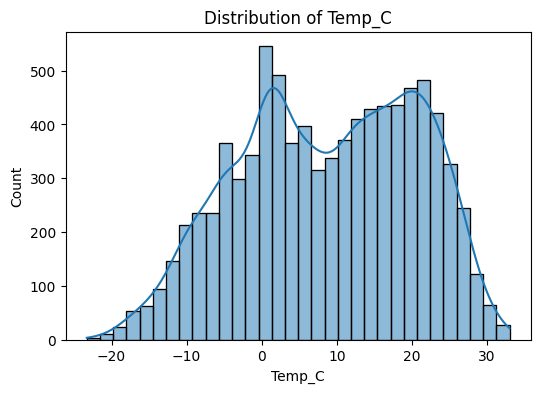

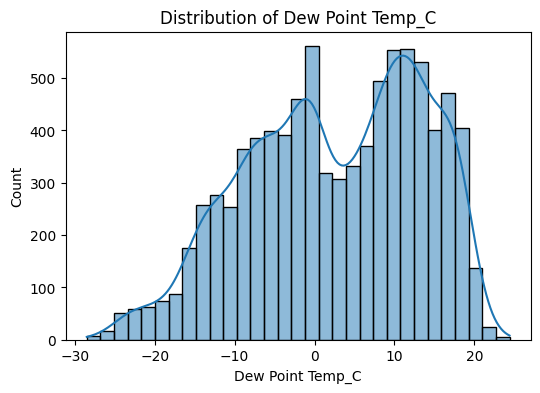

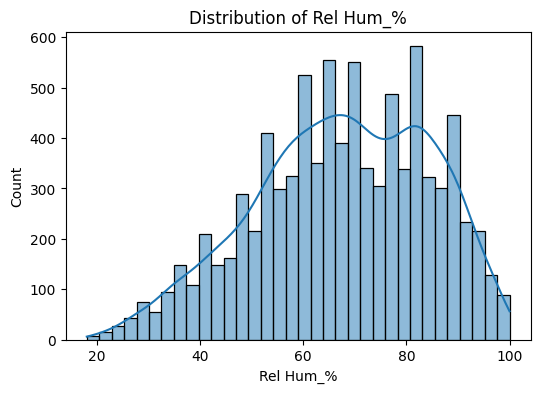

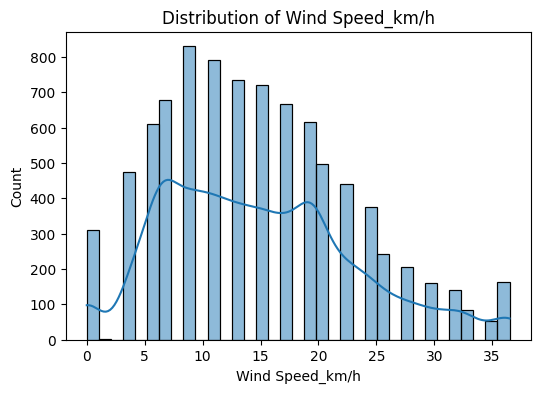

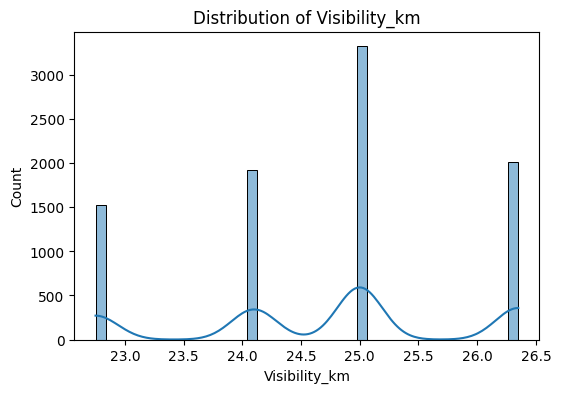

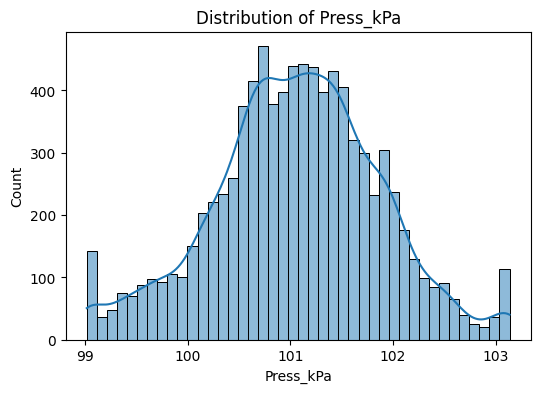

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dataset.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [15]:
# Check skewness for all numeric columns
dataset.skew(numeric_only=True)

,0
Temp_C,-0.177666
Dew Point Temp_C,-0.318433
Rel Hum_%,-0.323830
Wind Speed_km/h,0.529433
Visibility_km,-0.234436
Press_kPa,-0.096768


In [38]:
import numpy as np

# Copy dataset before transformation
df = dataset.copy()

df["Wind Speed_km/h_sqrt"] = np.sqrt(df["Wind Speed_km/h"])
df["Temp_C_sqrt"] = np.sqrt(df["Temp_C"])
df["Dew Point Temp_C_sqrt"] = np.sqrt(df["Dew Point Temp_C"])
df["Rel Hum_%_sqrt"] = np.sqrt(df["Rel Hum_%"])
df["Visibility_km_sqrt"] = np.sqrt(df["Visibility_km"])
df["Press_kPa_sqrt"] = np.sqrt(df["Press_kPa"])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


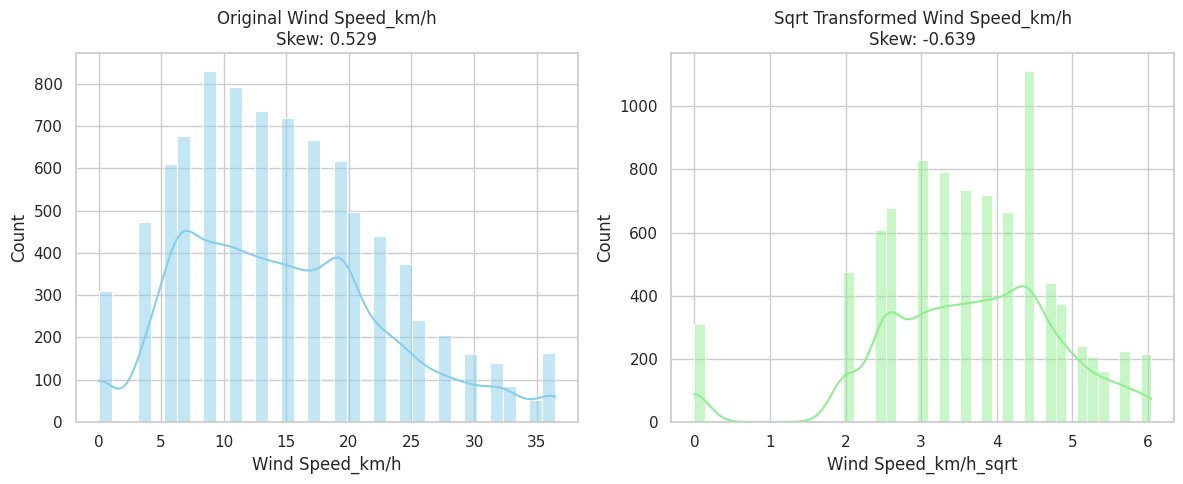

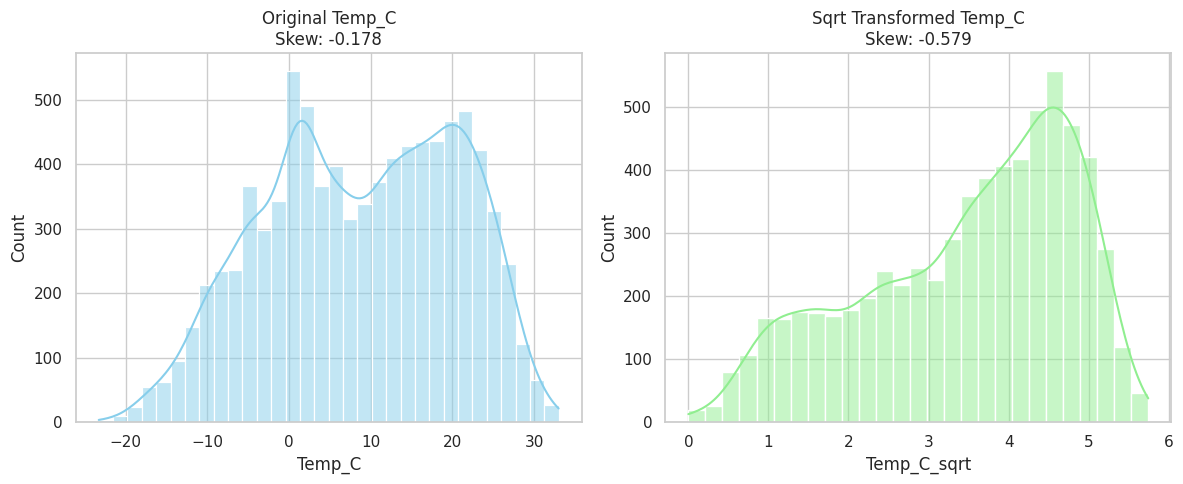

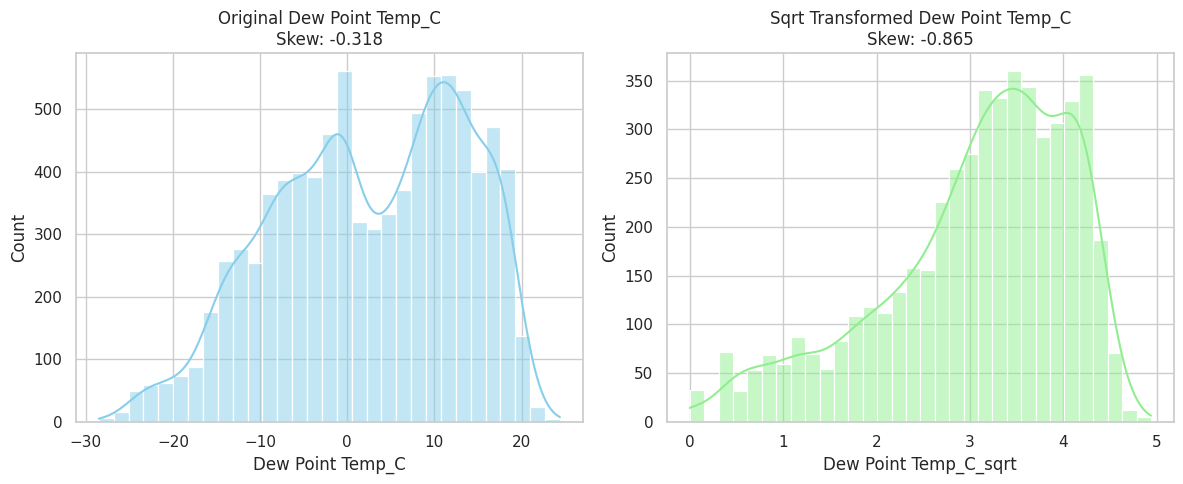

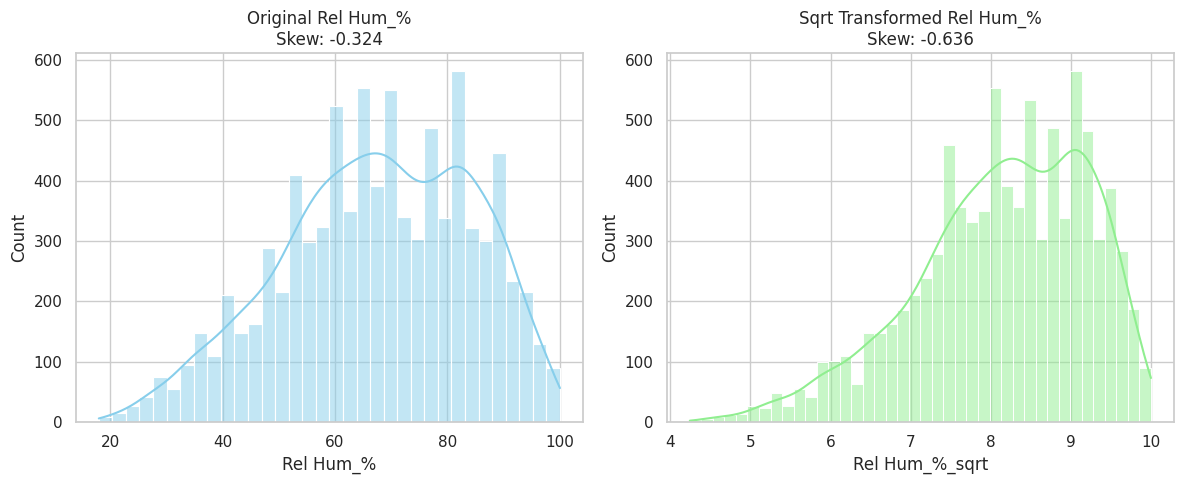

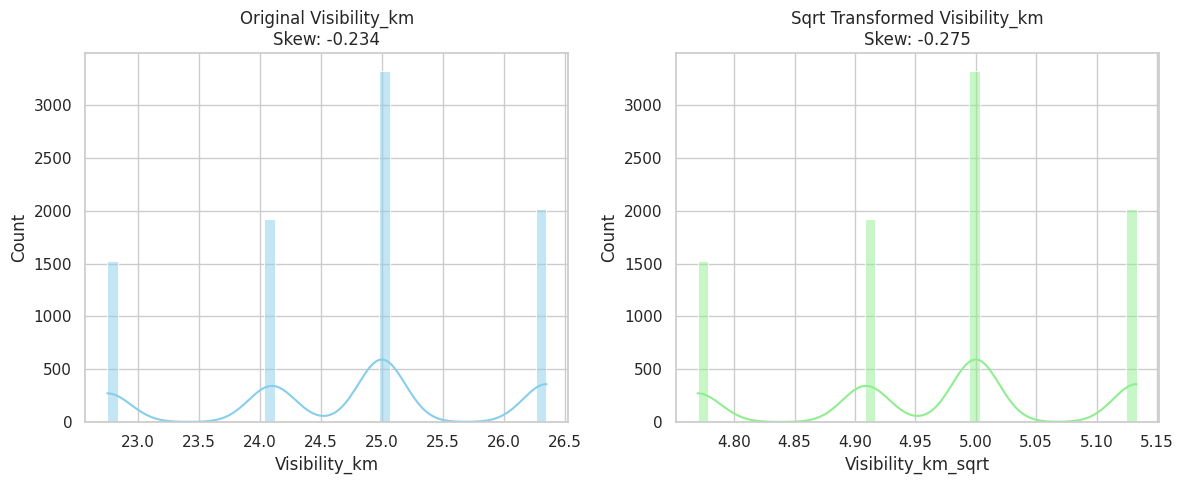

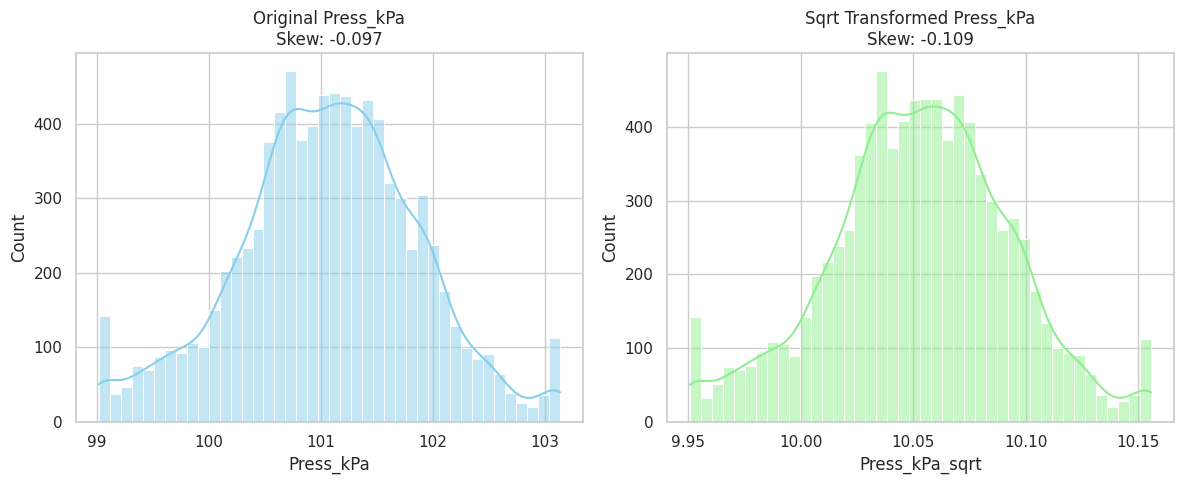

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_original_vs_sqrt(dataset, df, columns):
    sns.set(style="whitegrid")
    for col in columns:
        plt.figure(figsize=(12,5))

        # Original
        plt.subplot(1, 2, 1)
        sns.histplot(dataset[col], kde=True, color="skyblue")
        plt.title(f"Original {col}\nSkew: {dataset[col].skew():.3f}")

        # Square root transformed
        plt.subplot(1, 2, 2)
        sns.histplot(df[f"{col}_sqrt"], kde=True, color="lightgreen")
        plt.title(f"Sqrt Transformed {col}\nSkew: {df[f'{col}_sqrt'].skew():.3f}")

        plt.tight_layout()
        plt.show()

# List of columns you transformed
cols = ["Wind Speed_km/h", "Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Visibility_km", "Press_kPa"]

plot_original_vs_sqrt(dataset, df, cols)

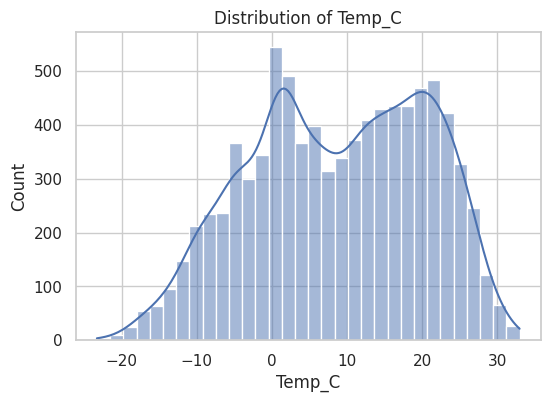

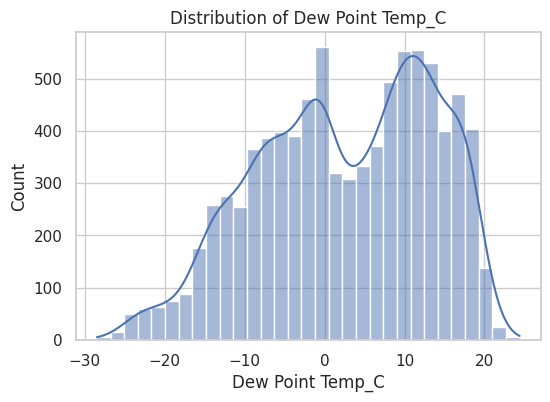

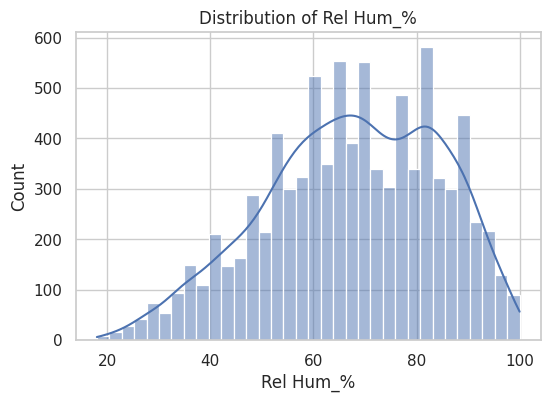

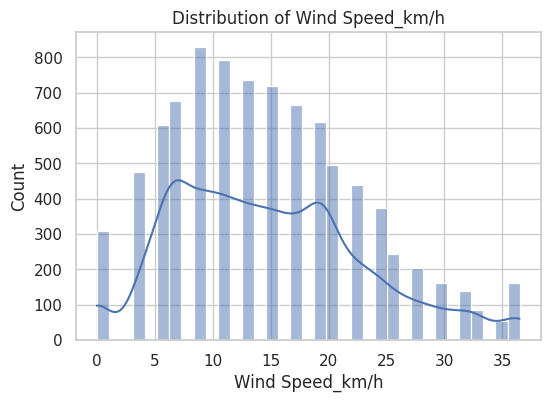

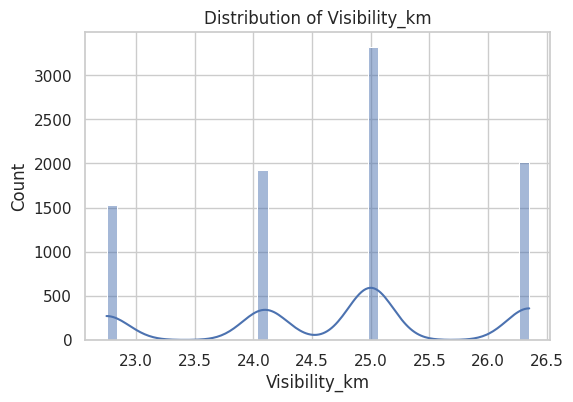

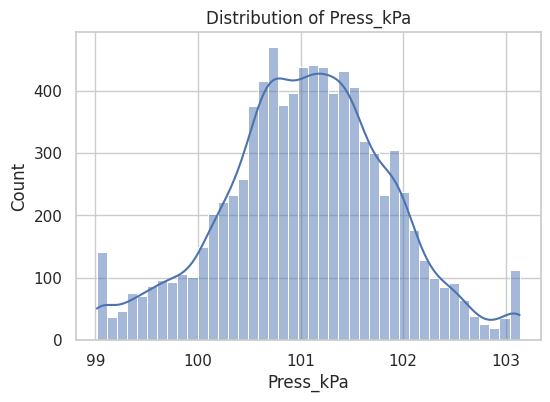

In [9]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [10]:
dep=dataset[["Weather_Simplified"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cls=classification_report(y_test, y_pred)

In [ ]:
print(cls)

In [11]:
#In the above classification report the lable
#"clear"-had a precession fo 64% were actually correct and recall of 66% of actually predicted wrong
#"cloud"-65% in precision were actually as correct and 65% in recall as actually wrong
#"fog"-62% were actually correct and 70% were actually predected wrong
#"rain"-53% were actually correct and 52% were actually wrong("HALF OF THE PREDICTION WERE WRONG")
#"snow"-77% were actually correct and 65% were actually wrong
#the accuracy is 64% because of imbalanced data(Cloud-3797, Clear-3432, Rain-921, Snow-464, Fog-170) So we have to use SMOTE-Knn